### **Author** : Sumeet Jadhav
### **Intern at The Sparks Foundation GRIP**
### **Domain** : Data Science & Business Analytics 
### **Task 5** : Exploratory Data Analysis - Sports.

As Sports Analyst

=> Find out the most successful teams, players and factors contributing win or loss of a team.      
=> Suggest teams or players a company should endorse for its products.



In [126]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###  Read the data from the dataset

In [127]:
deliveries = pd.read_csv("E:\Python\deliveries.csv")
matches = pd.read_csv("E:\Python\matches.csv")


### Data Overview

In [128]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [129]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Describing the Data

In [130]:
print(matches.shape)
print('-----------------------------------------------------------------------------------------------------------')
print(deliveries.shape)

(756, 18)
-----------------------------------------------------------------------------------------------------------
(179078, 21)


In [131]:
print(matches.info())
print('-----------------------------------------------------------------------------------------------------------')
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [132]:
print(matches.describe())
print('-----------------------------------------------------------------------------------------------------------')
print(deliveries.describe().T)

                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000
-----------------------------------------------------------------------------------------------------------
                  count         mean          std  min    25%    50%    75%  \
match_id       179078.0  1802.252957  3472.322805  1.0  190.0  379.0  567.0   
inning         179078.0     1.482952     0.502074  1.0    1.0    1.0

### Checking Duplicate Rows

In [133]:
print(matches.duplicated().sum())
print('-------------------------------------------------------------------------------------')
print(deliveries.duplicated().sum())

0
-------------------------------------------------------------------------------------
23


### Dropping Duplicate Rows


In [134]:
deliveries = deliveries.drop_duplicates()

In [135]:
print(matches.duplicated().sum())
print('-------------------------------------------------------------------------------------')
print(deliveries.duplicated().sum())

0
-------------------------------------------------------------------------------------
0


### Total Matches Played



In [136]:
print('Total matches given in the dataset are:',matches.shape[0])

Total matches given in the dataset are: 756


In [137]:
venue = matches.groupby(['city','venue']).count()['season']
venue=pd.DataFrame(venue).sort_values(by='season',ascending=False)

In [138]:
venue

,,season
city,venue,
Kolkata,Eden Gardens,77
Mumbai,Wankhede Stadium,73
Delhi,Feroz Shah Kotla,67
Bangalore,M Chinnaswamy Stadium,66
Hyderabad,"Rajiv Gandhi International Stadium, Uppal",56
Chennai,"MA Chidambaram Stadium, Chepauk",49
Jaipur,Sawai Mansingh Stadium,47
Chandigarh,"Punjab Cricket Association Stadium, Mohali",35
Pune,Maharashtra Cricket Association Stadium,21


### Matches played in each Season

In [139]:
season_matches = matches['season'].value_counts()
season_matches

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [140]:
season_matches.keys()

Int64Index([2013, 2012, 2011, 2010, 2014, 2016, 2018, 2019, 2017, 2015, 2008,
            2009],
           dtype='int64')

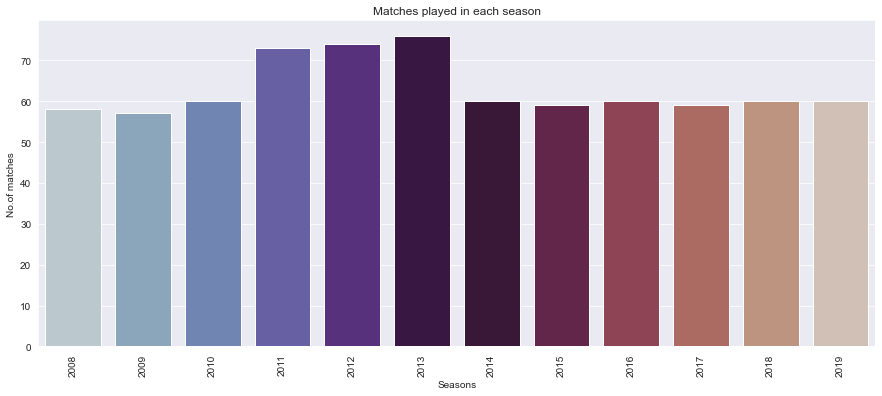

In [141]:
plt.figure(figsize=(15,6))
sns.barplot(y = season_matches.values, x = season_matches.keys(), palette = 'twilight')
plt.title('Matches played in each season')
plt.xlabel('Seasons')
plt.ylabel('No.of matches')
plt.xticks(rotation = 90)
plt.show()

In [142]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Using plotly for Visualizations 

In [144]:
fig1 = px.bar(y = season_matches.values, x = season_matches.keys())
fig1.show()

### 2009 is the year with least IPL matches(57) and 2013 is  the year with most IPL matches(76).

In [145]:
matches['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [146]:
matches['team2'].value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

### Matches played since the beginning of the IPL

In [147]:
matches_played_each_team = (matches['team1'].value_counts()) + (matches['team2'].value_counts())
matches_played_each_team = matches_played_each_team.sort_values(ascending=False)
matches_played_each_team

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

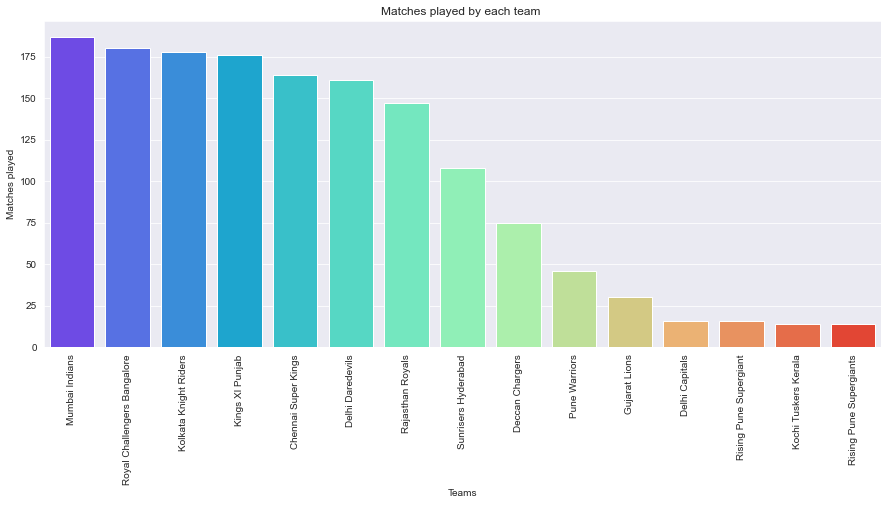

In [148]:
plt.figure(figsize=(15,6))
sns.barplot(y = matches_played_each_team.values, x = matches_played_each_team.keys(), palette = 'rainbow')
plt.title('Matches played by each team ')
plt.xlabel('Teams')
plt.ylabel('Matches played')
plt.xticks(rotation = 90)
plt.show()

### Mumbai Indians palyed the most number of matches folllowed by RCB since the inauguration of the IPL

In [149]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Team with most toss wins

In [150]:
most_toss_won = matches['toss_winner'].value_counts()
most_toss_won


Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

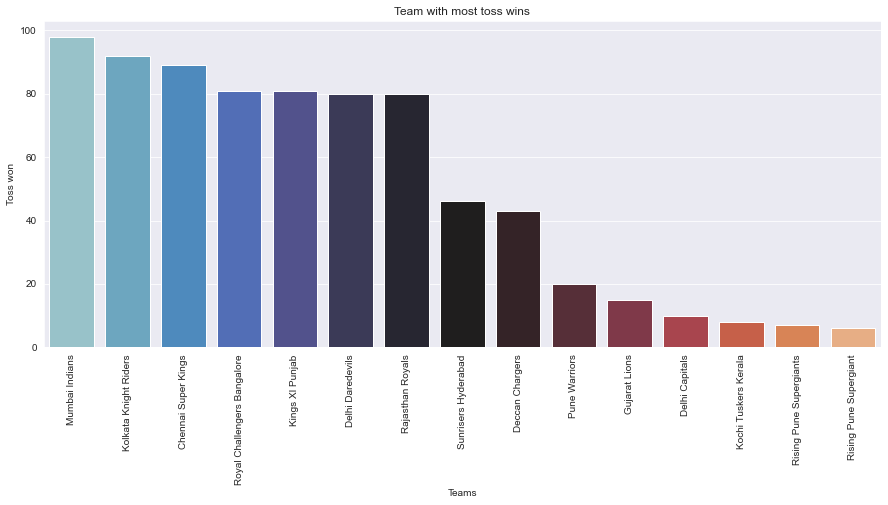

In [151]:
plt.figure(figsize=(15,6))
sns.barplot(y = most_toss_won.values, x = most_toss_won.keys(), palette = 'icefire')
plt.title('Team with most toss wins')
plt.xlabel('Teams')
plt.ylabel('Toss won')
plt.xticks(rotation = 90)
plt.show()

### Mumbai Indians won the toss most number of times.

In [152]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Toss Decisions

In [153]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

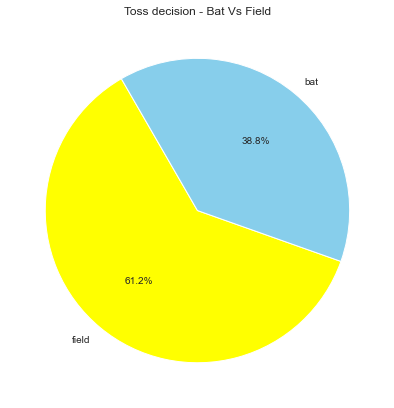

In [154]:
y = np.array(matches['toss_decision'].value_counts())
mylabels = matches['toss_decision'].value_counts().keys()
color = ["yellow", "skyblue"]
plt.figure(figsize=(7,7))
plt.pie(y, labels = mylabels, colors = color,autopct='%0.1f%%',startangle=120)
plt.title('Toss decision - Bat Vs Field')
plt.show()

### Teams preferred to field first than batting on winning the toss

In [155]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Most Wins 

In [156]:
most_won = matches['winner'].value_counts()
most_won

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

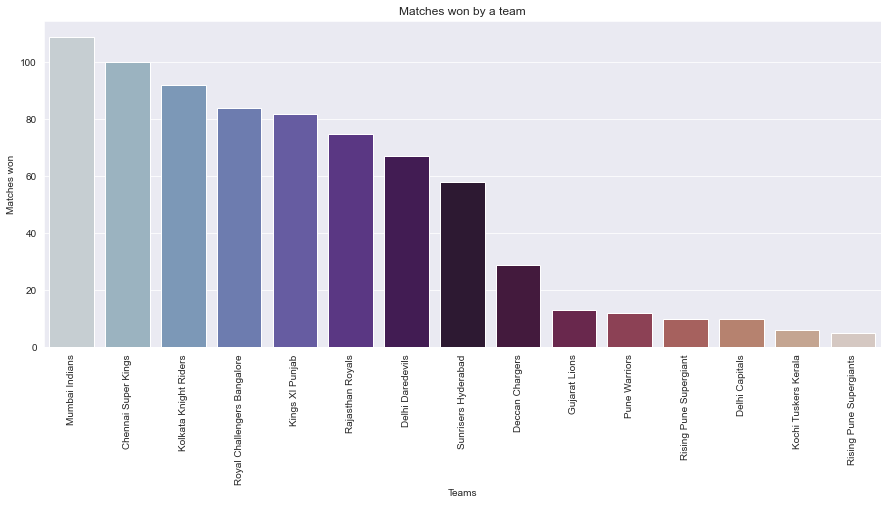

In [157]:
plt.figure(figsize=(15,6))
sns.barplot(y = most_won.values, x = most_won.keys(), palette = 'twilight')
plt.title('Matches won by a team')
plt.xlabel('Teams')
plt.ylabel('Matches won')
plt.xticks(rotation = 90)
plt.show()

### Mumbai Indians has won the most number of matches in the league

#### Season Winner

In [158]:
season_winner = matches[['season','winner']]
season_won = {}
for team in sorted(season_winner.season.unique()):
    season_won[team] = season_winner[season_winner.season == team]['winner'].tail(1).values[0]
season_won

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians'}

In [159]:
season_winner = pd.Series(season_won)
season_winner = pd.DataFrame(season_winner, columns=['team'])
season_winner

,team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


### Most wins by any Team

In [160]:
most_seasons_won = season_winner.value_counts()
most_seasons_won


team                 
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
dtype: int64

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

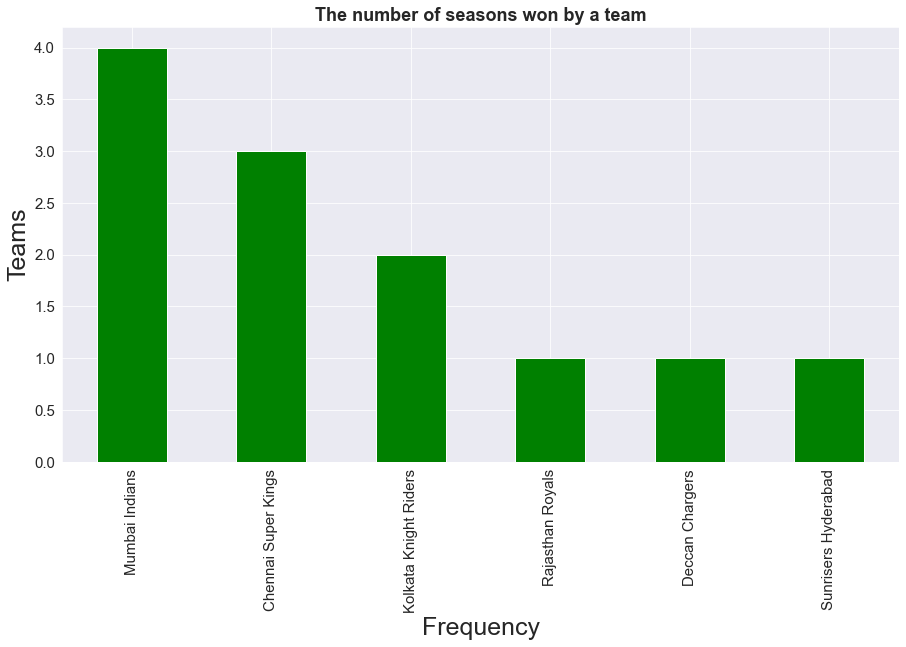

In [161]:
season_winner['team'].value_counts().plot(kind = 'bar', figsize = (15,8), color = 'g')
plt.title("The number of seasons won by a team",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)


### Mumbai Indians is the team to win most number of seasons(4 Seasons) followed by Chennai Super Kings(3 seasons)

#### Most man of the matches

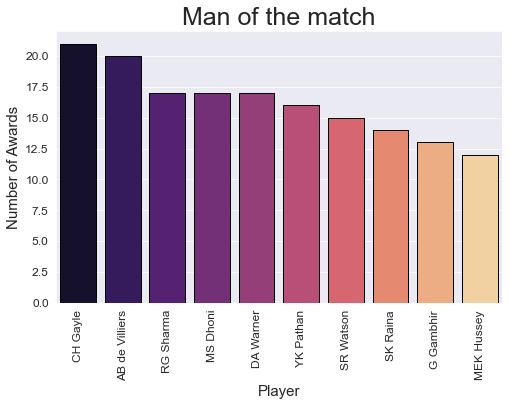

In [162]:
most_mom = matches['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(8,5))
sns.barplot(x=most_mom['Player'], y=most_mom['No. of Awards'], palette='magma', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Man of the match', size=25)
plt.ylabel('Number of Awards', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### Chris Gayle received most man of the match awards followed by ABD

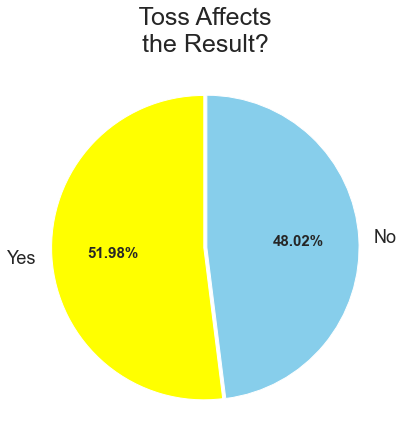

In [163]:
toss = matches.loc[matches['toss_winner'] == matches['winner']]
data = [len(toss), len(matches)-len(toss)]
fig, ax = plt.subplots(figsize=(12, 7))
colors = ["skyblue", "pink"]
wedges, texts, autotexts = ax.pie(data, labels=['Yes', 'No'], startangle=90,explode=(.01,.01) ,autopct='%1.2f%%',colors = color)
plt.title(' Toss Affects \nthe Result?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

### Considering the overall data, there is not much effect to the game by the toss

### Prefered decision after winning the toss

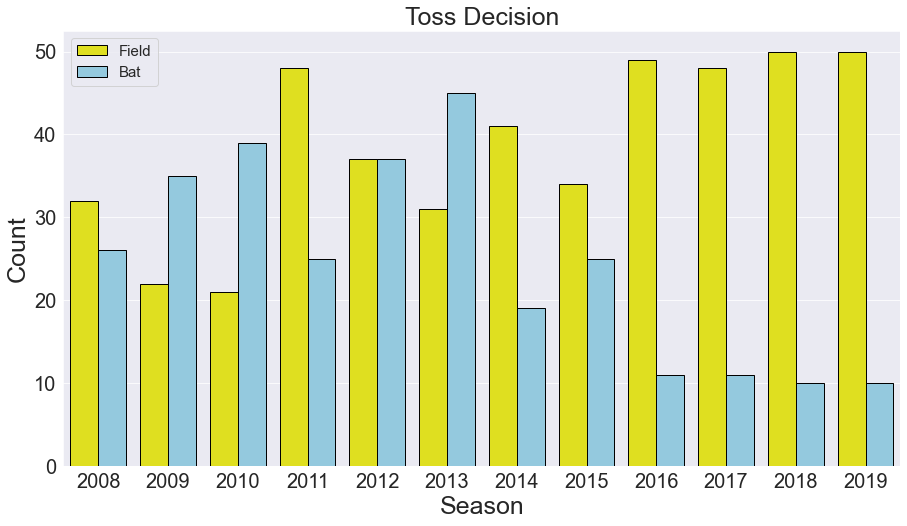

In [164]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x=matches['season'],hue=matches['toss_decision'] 
              ,palette=dict(field='yellow',bat='skyblue'), edgecolor='black')
plt.title('Toss Decision', size=25)
plt.ylabel('Count', size=25)
plt.xlabel('Season', size=25)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(('Field', 'Bat'), prop={"size" :15})
plt.show()

#### In last four years it is observed that the teams prefer to field after winning the toss.

### Most Wickets

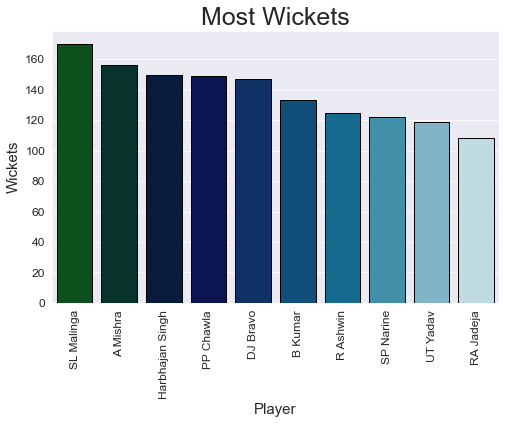

In [165]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='ocean', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Most Wickets', size=25)
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

#### Lasith Malinga took the most number of wickets in the league followed by Amit Mishra.

### Best Powerplay Bowler

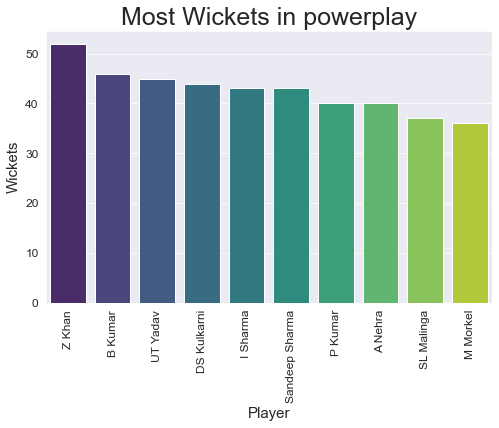

In [166]:
powerplay = [1,2,3,4,5,6]
best_bowler_pp = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal) & deliveries['over'].isin(powerplay)]
best_bowler_pp = best_bowler_pp['bowler'].value_counts().reset_index().head(10)
best_bowler_pp.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_pp['bowler'], y=best_bowler_pp['wickets'],palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Most Wickets in powerplay', size=25)
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### Z Khan took most wickets in powerplay followed by B Kumar

### Best death bowler

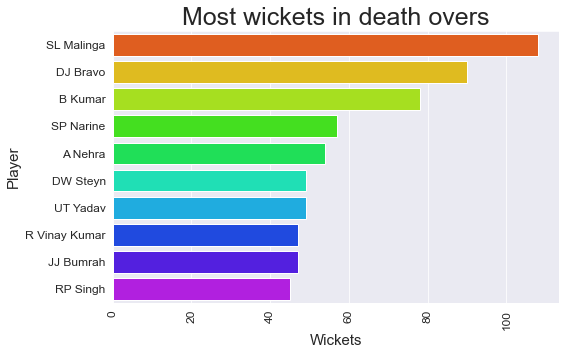

In [167]:
death = [16,17,18,19,20]
best_bowler_death = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal) & deliveries['over'].isin(death)]
best_bowler_death = best_bowler_death['bowler'].value_counts().reset_index().head(10)
best_bowler_death.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(y=best_bowler_death['bowler'], x=best_bowler_death['wickets'],palette='gist_rainbow')
plt.xticks(rotation='vertical')
plt.title('Most wickets in death overs', size=25)
plt.ylabel('Player', size=15)
plt.xlabel('Wickets', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### Malinga is the best bowler in the Death overs.

### Best Economy Bowler

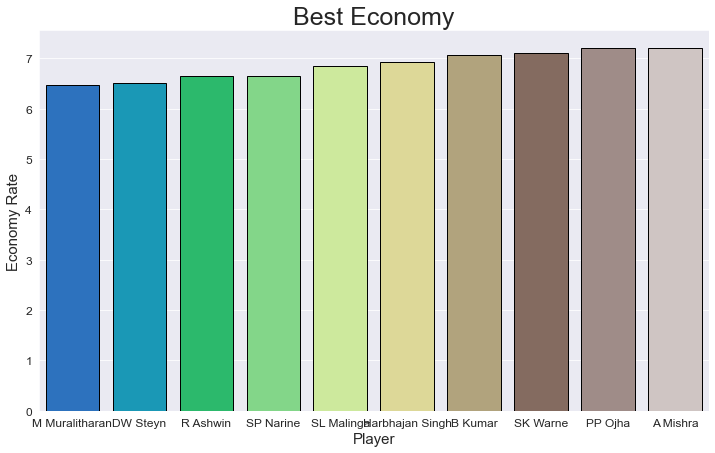

In [168]:
economy_rate=deliveries.groupby(['bowler']).sum()
economy_rate['over'] = deliveries['bowler'].value_counts()/6
economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] + economy_rate['batsman_runs']
economy_rate = economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(12,7))
sns.barplot(y=economy_rate['rate'], x=economy_rate.index, palette='terrain',edgecolor='black')
plt.title('Best Economy', size=25)
plt.xlabel('Player', size=15)
plt.ylabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### M Muralidharan, D Steyn has the best economy 

### Most Runs

In [169]:
best_batsman = deliveries.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)
best_batsman

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4631
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4444
AB de Villiers,4428


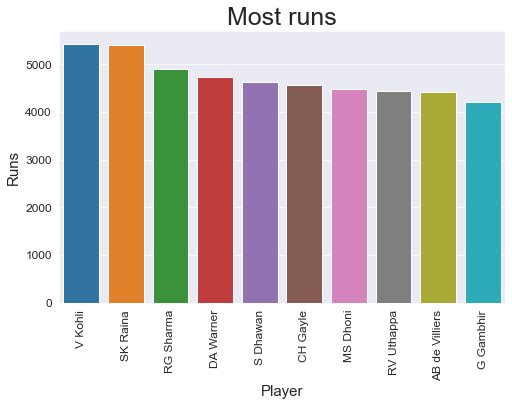

In [170]:
plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='tab10')
plt.xticks(rotation='vertical')
plt.title('Most runs', size=25)
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### Virat Kohli and Suresh Raina are the top run scorers followed by RG Sharma , DA Warner. 
### G Gambhir is the Lowest run scorer.

### Most runs in death overs

In [171]:
best_batsman_death = deliveries.loc[deliveries['over'].isin(death)]
best_batsman_death = best_batsman_death.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_death = best_batsman_death.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)
best_batsman_death

,batsman_runs
batsman,
MS Dhoni,2669
KA Pollard,1562
RG Sharma,1450
AB de Villiers,1412
V Kohli,1154
YK Pathan,1134
KD Karthik,1073
RA Jadeja,940
Yuvraj Singh,911


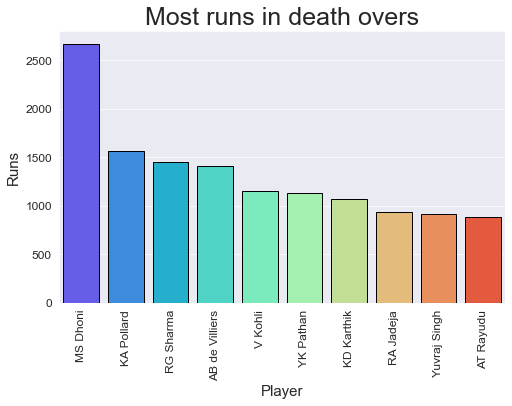

In [172]:
plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_death.index, y=best_batsman_death['batsman_runs'], palette='rainbow', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Most runs in death overs', size=25)
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### MS Dhoni is the best batsman to play in the death overs and way much ahead than other players.

### Chasing Vs Defending

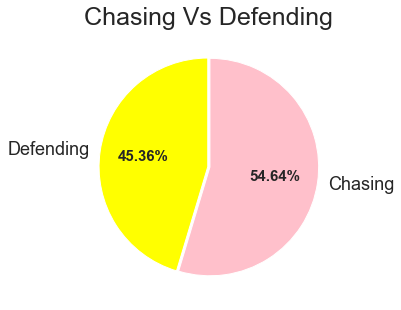

In [173]:
bat_first = matches.loc[matches['win_by_runs'] != 0]
bat_second = matches.loc[matches['win_by_wickets'] != 0]

data = [len(bat_first), len(bat_second)]
ilabels=['Defending', 'Chasing']
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels= ilabels, startangle=90,explode=(.01,.01) ,autopct='%1.2f%%',
                                  colors=['yellow','pink'])
plt.title('Chasing Vs Defending',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

#### There isn't much difference, but the chasing teams have a slight edge over defending teams

### Venue to host most matches

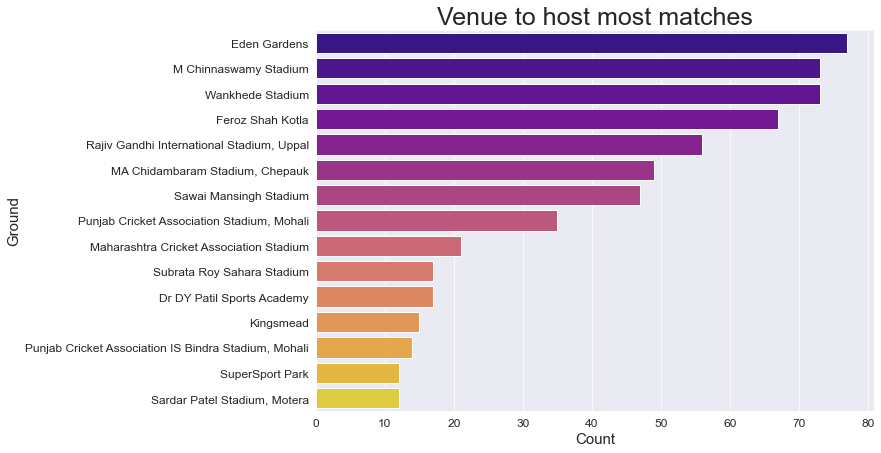

In [174]:
venue = matches['venue'].value_counts().reset_index().head(15)
venue.columns = ['ground', 'Matches']

plt.figure(figsize=(10,7))
sns.barplot(x=venue['Matches'],y=venue['ground'],palette='plasma')
plt.title('Venue to host most matches', size=25)
plt.ylabel('Ground', size=15)
plt.xlabel('Count', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### Finale matches analysis

In [175]:
finale=matches.drop_duplicates(subset=['season'], keep='last')
finale[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [176]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')
Toss=matches.toss_decision.value_counts()

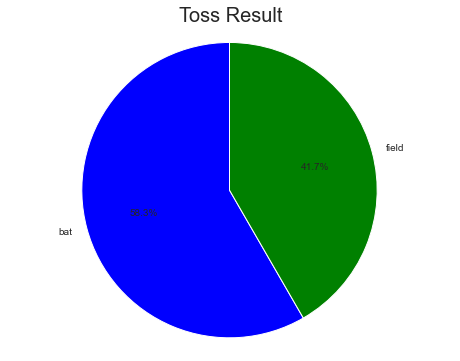

In [177]:
Toss=finale.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['blue','green']
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

### 58.3% of the team who won the toss chose to bat first

In [178]:
finale[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [179]:
finale[['season','winner','player_of_match','win_by_runs','win_by_wickets']].reset_index(drop=True)

,season,winner,player_of_match,win_by_runs,win_by_wickets
0,2017,Mumbai Indians,KH Pandya,1,0
1,2008,Rajasthan Royals,YK Pathan,0,3
2,2009,Deccan Chargers,A Kumble,6,0
3,2010,Chennai Super Kings,SK Raina,22,0
4,2011,Chennai Super Kings,M Vijay,58,0
5,2012,Kolkata Knight Riders,MS Bisla,0,5
6,2013,Mumbai Indians,KA Pollard,23,0
7,2014,Kolkata Knight Riders,MK Pandey,0,3
8,2015,Mumbai Indians,RG Sharma,41,0
9,2016,Sunrisers Hyderabad,BCJ Cutting,8,0


In [180]:
print("The Number of times a team won a toss and went on to win the match in finals: ",len(finale[finale['toss_winner']==finale['winner']]['winner']))


The Number of times a team won a toss and went on to win the match in finals:  9


In [181]:
finale['player_of_match'].value_counts()

KH Pandya      1
YK Pathan      1
A Kumble       1
SK Raina       1
M Vijay        1
MS Bisla       1
KA Pollard     1
MK Pandey      1
RG Sharma      1
BCJ Cutting    1
SR Watson      1
JJ Bumrah      1
Name: player_of_match, dtype: int64

## Conclusion:

* A total of 756 matches have been held so far in the league.

* 2013 is the season with most number of matches and 2009 is the season with least number of matches.

* Mumbai Indians played the most matches in IPL followed by Royal Challengers Bangalore.

* The most times a team winning the toss in IPL is Mumbai Indians.

* 62.1% teams which won the toss, chose to field first.

* Mumbai Indians is the team with most wins in the league followed by Chennai SuperKings.

### Most Successful Players : 

* Virat Kohli is the most run getter in the league followed by Suresh Raina with a very small margin. 

* MS Dhoni is the best batsman in death overs by the number of runs he scored in death overs. 

* Zaheer Khan is the best bowler in powerplay, whereas Malinga has been crucial in the death overs (as per wickets taken).

* M Muralitharan and Steyn are the most economical bowlers in the league.

* Chris Gayle received the most man of the match awards followed by Ab de Villiers.

* Lasith Malinga is the highest wicket taker in the league, followed by Amit Mishra.

### Most Successful teams :

* Mumbai Indians is the most successful team in IPL with 4 trophies, follwed by CSK(3), KKR(2), Hyderabad franchise(2(1 as Deccan Chargers and 1 as SRH)), Rajasthan Royals(1).

### Factors contributing to win or loss of a team :

* 51.8% Teams winning the toss have won the game, 48.02% have lost the game. There is no much difference, so toss is not the key deciding factor.

* 54.64% Chasing teams have won the match . 

* Majorly in the last four seasons(2016,2017,2018,2019) teams won the toss felt comfortable to chase.

* In the season finals, the win percent is 66.7% for a defending team.

* In finals, 9 out of 12 times, a team won the toss went on to win the match.

* In finals, teams decision to bat first after winng toss is 58.3%.

### Suggest the Teams or Players a company should endorse for its Products

#### Franchise -

* The companies should look at Mumbai Indians and Chennai Super Kings for endorsement as they are the most successful teams in IPL.

* Companies can also go with Royals Challengers bangalore as the franchise has a huge fanbase as Mumbai Indians and Chennai Super Kings, though its not successfull like them.

#### Players -

* Virat Kohli, Rohit Sharma and MS Dhoni are the Indian stars of the IPL who can attract a larger audience, so endorsing products with them will have a wider reach.

* Foreign Players like Chris Gayle, AB de Villiers, David Warner, Malinga are the match winners and very popular among the viewers.

* Other Players like Bhuvaneshwar Kumar, Suresh Raina, Dhawan, Yuvaraj Singh whos has been constantly performing in the league, can be the go to players for endorsements as they are constantly in the limelight because of their performances.

* Considering these players for endorsement will be benificial for the company as they are constantly in the news for their performances and can attract a large number of viewers, which gives our products a better reach.

 

# **Thank you.**